# Transformaciones Geom√©tricas y Ecualizaci√≥n de Histogramas

## Objetivo
Analizar y aplicar t√©cnicas de **procesamiento digital de im√°genes** que incluyan transformaciones geom√©tricas (rotaci√≥n, traslaci√≥n y escalado) y **ecualizaci√≥n de histogramas**, con el fin de comprender c√≥mo se modifican las propiedades espaciales y tonalidades de una imagen.

---

## Fundamentaci√≥n Te√≥rica

### 1. Procesamiento Digital de Im√°genes
El procesamiento digital de im√°genes consiste en aplicar **operaciones matem√°ticas y computacionales** sobre una imagen para mejorar su calidad, extraer informaci√≥n o modificar su estructura visual. Las im√°genes son tratadas como matrices num√©ricas, donde cada p√≠xel representa un valor de intensidad o color.

---

### 2. Transformaciones Geom√©tricas

Las **transformaciones geom√©tricas** alteran la posici√≥n, orientaci√≥n o tama√±o de los p√≠xeles de una imagen, manteniendo su contenido original. Son esenciales en tareas como la alineaci√≥n, rotaci√≥n, registro o correcci√≥n de perspectiva.

#### a) Rotaci√≥n
Consiste en girar la imagen un √°ngulo determinado respecto a un punto de referencia, generalmente el centro.  
Se representa mediante una **matriz de rotaci√≥n**:



\begin{bmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{bmatrix}


Esta operaci√≥n se implementa en OpenCV con la funci√≥n `cv2.getRotationMatrix2D()`.

####  b) Traslaci√≥n
Desplaza todos los p√≠xeles una distancia fija en los ejes X y Y.  
Se describe mediante la **matriz de traslaci√≥n**:


\begin{bmatrix}
1 & 0 & t_x \\
0 & 1 & t_y
\end{bmatrix}


donde \(t_x\) y \(t_y\) son los desplazamientos horizontales y verticales respectivamente.

####  c) Escalado
Cambia el tama√±o de la imagen multiplicando sus dimensiones por un factor de escala \(s\).  

\begin{bmatrix}
s_x & 0 \\
0 & s_y
\end{bmatrix}

Un valor de \(s > 1\) ampl√≠a la imagen, mientras que \(s < 1\) la reduce.

En OpenCV, las transformaciones afines combinan estos efectos y se aplican con `cv2.warpAffine()`.

---

### 3. Creaci√≥n de GIF Animado

La generaci√≥n de un GIF a partir de una secuencia de im√°genes transformadas permite **visualizar din√°micamente** los cambios geom√©tricos (rotaci√≥n y escala progresiva).  
Este proceso se realiza usando la librer√≠a `PIL` o `imageio`, que combinan varios fotogramas en una animaci√≥n continua.

---

### 4. Histogramas de Im√°genes

Un **histograma** representa la distribuci√≥n de los niveles de intensidad de los p√≠xeles en una imagen.  
- En im√°genes **claras**, el histograma se concentra en los valores altos (cercanos a 255).  
- En im√°genes **oscuras**, predomina en los valores bajos (cercanos a 0).  
- En im√°genes **de buen contraste**, el histograma cubre una mayor parte del rango tonal.

La funci√≥n `cv2.calcHist()` permite obtener el histograma de una imagen en OpenCV.

---

### 5. Ecualizaci√≥n de Histograma

La **ecualizaci√≥n de histograma** es una t√©cnica de mejora del contraste que redistribuye los niveles de intensidad de una imagen, buscando que los valores se repartan de forma m√°s uniforme.  
Su objetivo es **aumentar el rango din√°mico** visible y resaltar detalles en zonas oscuras o muy iluminadas.

Matem√°ticamente, se basa en la **funci√≥n de distribuci√≥n acumulativa (CDF)** del histograma normalizado.

En OpenCV, se implementa mediante:
```python
cv2.equalizeHist(imagen_gris)


üìÇ Carpeta de entrada: c:\Users\sebastiang\Documents\GitHub\Trabajo_01_Quartz_Meditativo\Rotacion_Traslacion_Ecualizacion\Input
üìÇ Carpeta de salida: c:\Users\sebastiang\Documents\GitHub\Trabajo_01_Quartz_Meditativo\Rotacion_Traslacion_Ecualizacion\Output
‚úÖ Imagen cargada: casa_dia.jpg
‚úÖ Imagen cargada: casa_noche.jpg


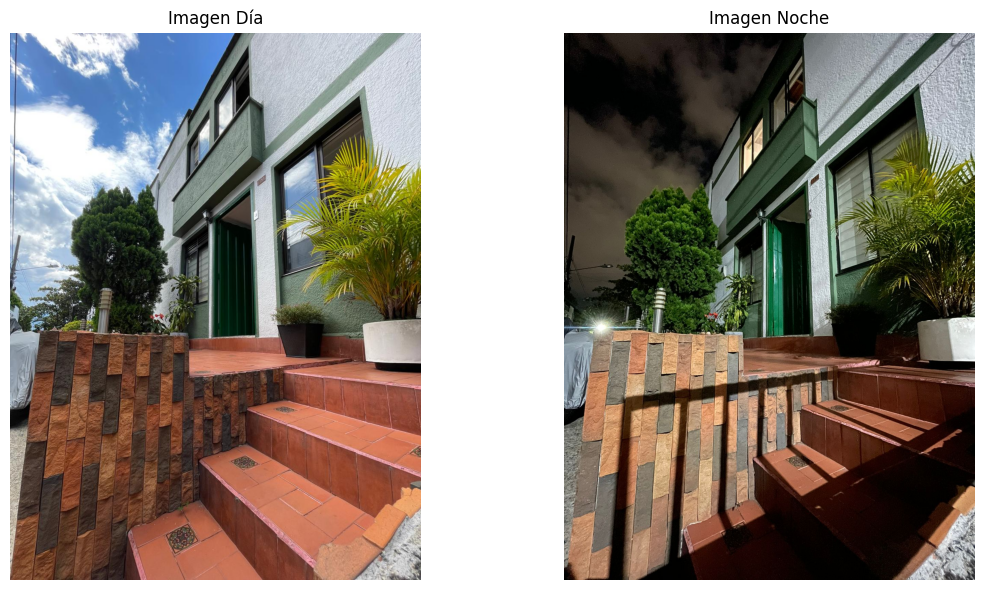

üíæ Imagen guardada en: Output\imagenes_originales.png


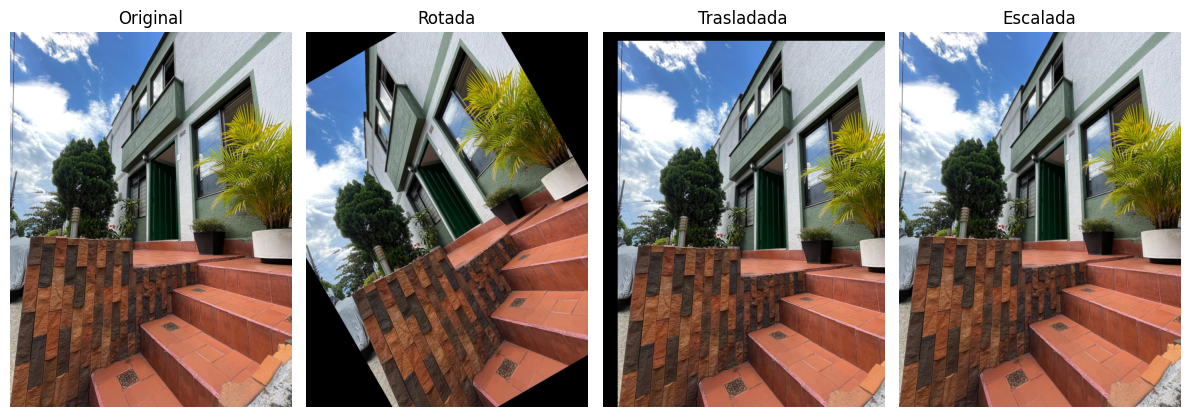

üíæ Imagen guardada en: Output\transformaciones.png
üíæ GIF creado: Output\transformaciones.gif


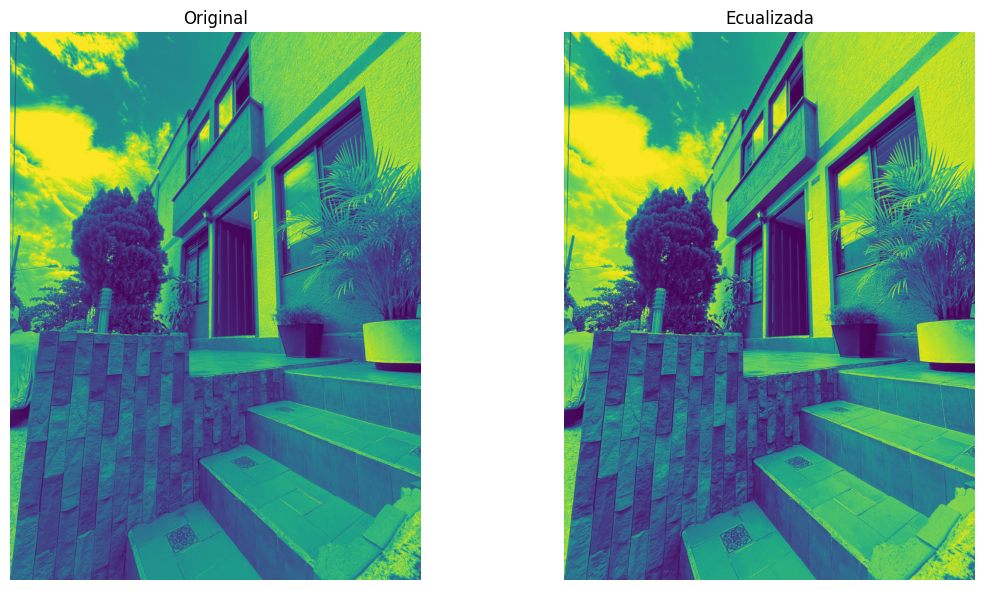

üíæ Imagen guardada en: Output\ecualizacion.png


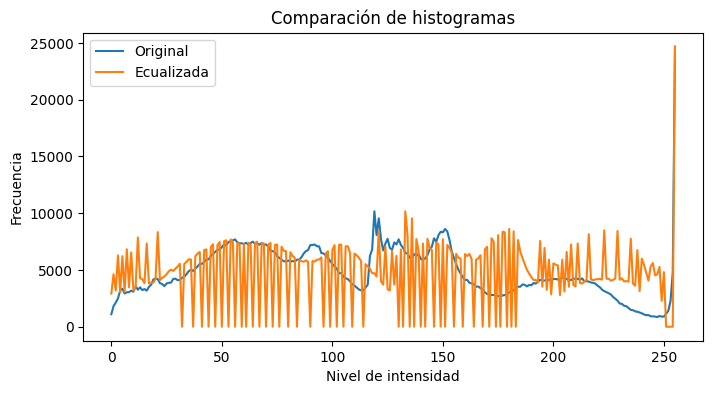

üíæ Histograma guardado: Output\histograma_ecualizacion.png


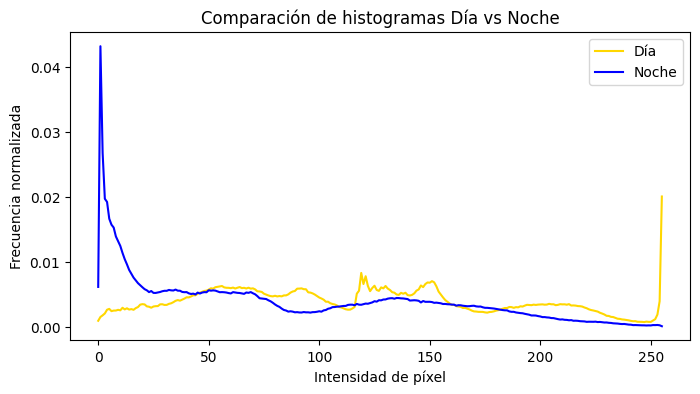

üíæ Comparaci√≥n guardada: Output\comparacion_histogramas.png


In [2]:


import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import imageio
import os

# ==============================================
# CONFIGURACI√ìN DE CARPETAS
# ==============================================
INPUT_DIR = "Input"
OUTPUT_DIR = "Output"

os.makedirs(INPUT_DIR, exist_ok=True)
os.makedirs(OUTPUT_DIR, exist_ok=True)

print("üìÇ Carpeta de entrada:", os.path.abspath(INPUT_DIR))
print("üìÇ Carpeta de salida:", os.path.abspath(OUTPUT_DIR))

# ==============================================
# FUNCIONES AUXILIARES
# ==============================================

def cargar_imagen(nombre_archivo):
    """Carga una imagen desde la carpeta Input y la devuelve en RGB"""
    ruta = os.path.join(INPUT_DIR, nombre_archivo)
    if not os.path.exists(ruta):
        raise FileNotFoundError(f"‚ùå No se encontr√≥ la imagen: {ruta}")
    img = cv2.imread(ruta)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print(f"‚úÖ Imagen cargada: {nombre_archivo}")
    return img, ruta


def mostrar_imagenes(imagenes, titulos, nombre_salida, figsize=(12, 6)):
    """Muestra una lista de im√°genes con sus t√≠tulos y las guarda en Output"""
    n = len(imagenes)
    plt.figure(figsize=figsize)
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(imagenes[i])
        plt.title(titulos[i])
        plt.axis("off")

    plt.tight_layout()
    ruta_salida = os.path.join(OUTPUT_DIR, nombre_salida)
    plt.savefig(ruta_salida)
    plt.show()
    print(f"üíæ Imagen guardada en: {ruta_salida}")


def transformar_imagen(img, angulo=0, traslacion=(0, 0), escala=1.0):
    """Aplica rotaci√≥n, traslaci√≥n y escala a una imagen"""
    h, w = img.shape[:2]
    center = (w // 2, h // 2)

    # Rotaci√≥n + Escala
    M_rot = cv2.getRotationMatrix2D(center, angulo, escala)
    transformed = cv2.warpAffine(img, M_rot, (w, h))

    # Traslaci√≥n
    tx, ty = traslacion
    M_trans = np.float32([[1, 0, tx], [0, 1, ty]])
    transformed = cv2.warpAffine(transformed, M_trans, (w, h))

    return transformed


def crear_gif(imagen, pasos=8, duracion=300, nombre="transformaciones.gif"):
    """Crea un GIF de transformaciones rotaci√≥n + escala decreciente"""
    h, w = imagen.shape[:2]
    center = (w // 2, h // 2)
    frames = []

    for i in range(pasos):
        angle = 15 * i
        scale = max(0.1, 1 - i * 0.05)
        M = cv2.getRotationMatrix2D(center, angle, scale)
        transformed = cv2.warpAffine(imagen, M, (w, h))
        frames.append(Image.fromarray(transformed))

    ruta_gif = os.path.join(OUTPUT_DIR, nombre)
    frames[0].save(ruta_gif, save_all=True, append_images=frames[1:], duration=duracion, loop=0)
    print(f"üíæ GIF creado: {ruta_gif}")


def ecualizar_histograma(img, nombre="ecualizacion.png"):
    """Convierte a gris y ecualiza el histograma"""
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    eq = cv2.equalizeHist(gray)

    # Mostrar y guardar im√°genes
    mostrar_imagenes([gray, eq], ["Original", "Ecualizada"], nombre)

    # Mostrar histogramas
    hist_original = cv2.calcHist([gray], [0], None, [256], [0, 256])
    hist_eq = cv2.calcHist([eq], [0], None, [256], [0, 256])

    plt.figure(figsize=(8, 4))
    plt.plot(hist_original, label="Original")
    plt.plot(hist_eq, label="Ecualizada")
    plt.title("Comparaci√≥n de histogramas")
    plt.xlabel("Nivel de intensidad")
    plt.ylabel("Frecuencia")
    plt.legend()

    ruta_hist = os.path.join(OUTPUT_DIR, "histograma_ecualizacion.png")
    plt.savefig(ruta_hist)
    plt.show()
    print(f"üíæ Histograma guardado: {ruta_hist}")


def comparar_histogramas(nombres_archivos, etiquetas=["D√≠a", "Noche"], nombre="comparacion_histogramas.png"):
    """Compara histogramas de im√°genes D√≠a y Noche"""
    if len(nombres_archivos) < 2:
        print("‚ö†Ô∏è Se requieren al menos dos im√°genes para comparar histogramas.")
        return

    hists = []
    for archivo in nombres_archivos:
        ruta = os.path.join(INPUT_DIR, archivo)
        img = cv2.imread(ruta)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
        hist /= hist.sum()
        hists.append(hist)

    plt.figure(figsize=(8, 4))
    colores = ['gold', 'blue']
    for i in range(2):
        plt.plot(hists[i], label=etiquetas[i], color=colores[i])
    plt.title("Comparaci√≥n de histogramas D√≠a vs Noche")
    plt.xlabel("Intensidad de p√≠xel")
    plt.ylabel("Frecuencia normalizada")
    plt.legend()

    ruta_salida = os.path.join(OUTPUT_DIR, nombre)
    plt.savefig(ruta_salida)
    plt.show()
    print(f"üíæ Comparaci√≥n guardada: {ruta_salida}")

# ==============================================
# 1. CARGAR IM√ÅGENES DESDE INPUT
# ==============================================
img_dia, ruta_dia = cargar_imagen("casa_dia.jpg")
img_noche, ruta_noche = cargar_imagen("casa_noche.jpg")

mostrar_imagenes([img_dia, img_noche], ["Imagen D√≠a", "Imagen Noche"], "imagenes_originales.png")

# ==============================================
# 2. TRANSFORMACIONES GEOM√âTRICAS
# ==============================================
rotated = transformar_imagen(img_dia, angulo=30)
translated = transformar_imagen(img_dia, traslacion=(50, 30))
scaled = cv2.resize(img_dia, None, fx=1.5, fy=1.5)

mostrar_imagenes(
    [img_dia, rotated, translated, scaled],
    ["Original", "Rotada", "Trasladada", "Escalada"],
    "transformaciones.png"
)

# ==============================================
# 3. CREAR GIF DE TRANSFORMACIONES
# ==============================================
crear_gif(img_dia)

# ==============================================
# 4. ECUALIZACI√ìN DE HISTOGRAMA
# ==============================================
ecualizar_histograma(img_dia)

# ==============================================
# 5. COMPARAR HISTOGRAMAS D√çA VS NOCHE
# ==============================================
comparar_histogramas(["casa_dia.jpg", "casa_noche.jpg"])


## Conclusiones

1. **Aplicaci√≥n de transformaciones geom√©tricas:**  
   Las operaciones de rotaci√≥n, traslaci√≥n y escalado permiten modificar la posici√≥n, orientaci√≥n y tama√±o de una imagen sin alterar su informaci√≥n estructural. Estas transformaciones son fundamentales para tareas de alineaci√≥n, an√°lisis espacial y visi√≥n por computadora.

2. **Visualizaci√≥n din√°mica mediante GIF:**  
   La creaci√≥n de un GIF que combina varias transformaciones sucesivas facilita comprender de forma visual c√≥mo var√≠a la imagen al modificar par√°metros como el √°ngulo de rotaci√≥n y el factor de escala, demostrando la naturaleza progresiva de los cambios geom√©tricos.

3. **Mejora del contraste por ecualizaci√≥n:**  
   La ecualizaci√≥n de histograma redistribuye los niveles de intensidad de una imagen, aumentando su rango din√°mico y mejorando la percepci√≥n de detalles en zonas oscuras o sobreexpuestas. Es una herramienta eficaz para optimizar im√°genes con mala iluminaci√≥n.

4. **Comparaci√≥n de histogramas d√≠a y noche:**  
   Al analizar im√°genes capturadas en condiciones de iluminaci√≥n distintas, se observa que las im√°genes diurnas concentran su histograma en valores altos (brillantes), mientras que las nocturnas lo hacen en valores bajos (oscuros). La ecualizaci√≥n equilibra ambas distribuciones, evidenciando su capacidad de mejorar el contraste independientemente de la hora o las condiciones lum√≠nicas.
